<a href="https://colab.research.google.com/github/ricardorocha86/Python-para-Machine-Learning/blob/master/Python_para_ML_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![texto alternativo](https://raw.githubusercontent.com/ricardorocha86/Python-para-Machine-Learning/master/Imagens/capa%20-%20python%20para%20ml%2005.jpg)


# **Python para Machine Learning** - Parte 5

Nesse notebook vamos ver:
- Pandas: loc e iloc
- Pandas: Groupby
- Exercício 

## **LOC e ILOC**

In [2]:
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/ricardorocha86/Dados-Redes-Sociais/master/Social_Network_Ads.csv'
ads = pd.read_csv(url)
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


Comandos **loc** e **iloc**

O comando loc permite filtrar conjuntos de dados usando listas booleanas (comparadores) e acessar colunas pelo nome. 

Sua sintaxe é a seguinte DataFrame.loc[ linhas , colunas ]

e é similar ao uso de DataFrame[ colunas ][ linhas ] 

Veja o exemplo abaixo duas maneiras de chegar na mesma informação, respondendo a pergunta: Qual a média de idade do público feminino ?

In [4]:
ads.loc[ads['Gender'] == 'Female', 'Age' ].mean()

38.411764705882355

In [5]:
 ads[ads['Gender'] == 'Female']['Age'].mean()

38.411764705882355

O comando **iloc** utilizamos quando queremos buscar em um conjunto de dados pelo índice número (iloc = index location)

In [6]:
ads.iloc[100:110, 1:5]

,Gender,Age,EstimatedSalary,Purchased
100,Male,27.0,88000.0,0
101,Male,28.0,59000.0,0
102,Female,32.0,86000.0,0
103,Female,33.0,149000.0,1
104,Female,19.0,21000.0,0
105,Male,21.0,72000.0,0
106,Female,26.0,35000.0,0
107,Male,27.0,89000.0,0
108,Male,26.0,86000.0,0
109,Female,38.0,80000.0,0


Qual a diferença da média de idade e salário estimado entre os possíveis gêneros?


In [7]:
ads[ads['Gender'] == 'Female'][['Age', 'EstimatedSalary']].mean()

Age                   38.411765
EstimatedSalary    71759.803922
dtype: float64

In [8]:
ads[ads['Gender'] == 'Male'][['Age', 'EstimatedSalary']].mean()

Age                   36.867347
EstimatedSalary    67642.857143
dtype: float64

Qual a diferença da média de idade e salário estimado entre quem comprou e quem não comprou?

In [9]:
ads[ads['Purchased'] == 0][['Age', 'EstimatedSalary']].mean()

Age                   32.793774
EstimatedSalary    60544.747082
dtype: float64

In [10]:
ads[ads['Purchased'] == 1][['Age', 'EstimatedSalary']].mean()

Age                   46.391608
EstimatedSalary    86272.727273
dtype: float64

O que se pode dizer sobre a compra entre os gêneros?

In [11]:
ads[ads['Purchased'] == 0]['Gender'].value_counts()

Male      130
Female    127
Name: Gender, dtype: int64

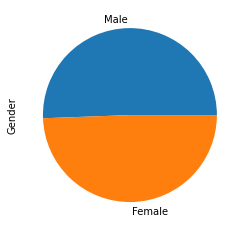

In [13]:
ads[ads['Purchased'] == 0]['Gender'].value_counts().plot(kind = 'pie');

In [14]:
ads[ads['Purchased'] == 1]['Gender'].value_counts()

Female    77
Male      66
Name: Gender, dtype: int64

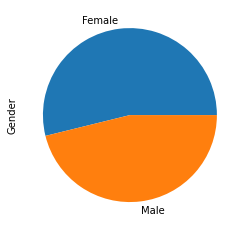

In [16]:
ads[ads['Purchased'] == 1]['Gender'].value_counts().plot(kind = 'pie');

## **GroupBy**

O groupby é útil quando queremos agregar uma informação e ter o seu resumo por grupos. Ela simplifica o trabalho que fizemos nesse notebook até agora. Veja os exemplos.

In [17]:
ads['Age'].groupby(ads['Gender']).mean()

Gender
Female    38.411765
Male      36.867347
Name: Age, dtype: float64

In [18]:
ads[['Age', 'EstimatedSalary']].groupby(ads['Gender']).mean()

,Age,EstimatedSalary
Gender,,
Female,38.411765,71759.803922
Male,36.867347,67642.857143


In [19]:
ads[['Age', 'EstimatedSalary']].groupby(ads['Gender']).max()

,Age,EstimatedSalary
Gender,,
Female,60.0,150000.0
Male,60.0,150000.0


In [20]:
ads[['Age', 'EstimatedSalary']].groupby(ads['Gender']).min()

,Age,EstimatedSalary
Gender,,
Female,18.0,15000.0
Male,18.0,15000.0


In [21]:
ads[['Age', 'EstimatedSalary', 'Purchased']].groupby(ads['Gender']).mean()

,Age,EstimatedSalary,Purchased
Gender,,,
Female,38.411765,71759.803922,0.377451
Male,36.867347,67642.857143,0.336735


In [22]:
ads.groupby(ads['Gender']).mean()

,User ID,Age,EstimatedSalary,Purchased
Gender,,,,
Female,1.569331e+07,38.411765,71759.803922,0.377451
Male,1.568970e+07,36.867347,67642.857143,0.336735


In [23]:
ads[['Age']].groupby(ads['Gender']).describe()

Age                                                    
        count       mean        std   min   25%   50%   75%   max
Gender                                                           
Female  204.0  38.411765  10.859019  18.0  30.0  37.5  47.0  60.0
Male    196.0  36.867347  10.043636  18.0  29.0  36.5  42.0  60.0

In [24]:
ads['EstimatedSalary'].groupby(ads['Gender']).describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,204.0,71759.803922,35595.236189,15000.0,44000.0,70500.0,90750.0,150000.0
Male,196.0,67642.857143,32421.819181,15000.0,43000.0,68000.0,86000.0,150000.0


In [25]:
ads['Age'].groupby(ads['Gender']).describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,204.0,38.411765,10.859019,18.0,30.0,37.5,47.0,60.0
Male,196.0,36.867347,10.043636,18.0,29.0,36.5,42.0,60.0


In [26]:
ads['Gender'].groupby(ads['Purchased']).describe()

,count,unique,top,freq
Purchased,,,,
0,257,2,Male,130
1,143,2,Female,77


In [27]:
ads['Age'].groupby(ads['Purchased']).describe()

,count,mean,std,min,25%,50%,75%,max
Purchased,,,,,,,,
0,257.0,32.793774,7.985844,18.0,26.0,34.0,38.0,59.0
1,143.0,46.391608,8.612172,27.0,39.5,47.0,53.0,60.0


In [28]:
ads['EstimatedSalary'].groupby(ads['Purchased']).describe()

,count,mean,std,min,25%,50%,75%,max
Purchased,,,,,,,,
0,257.0,60544.747082,24351.570102,15000.0,44000.0,61000.0,77000.0,141000.0
1,143.0,86272.727273,42064.200064,20000.0,41000.0,90000.0,122500.0,150000.0


In [29]:
ads['Age'].groupby([ads['Purchased'], ads['Gender']]).describe().round(2)

count   mean   std   min   25%   50%   75%   max
Purchased Gender                                                  
0         Female  127.0  33.11  8.47  18.0  27.0  33.0  39.0  59.0
          Male    130.0  32.48  7.50  18.0  26.0  34.5  38.0  49.0
1         Female   77.0  47.16  8.46  27.0  42.0  48.0  53.0  60.0
          Male     66.0  45.50  8.76  28.0  39.0  46.0  50.5  60.0

In [30]:
ads['EstimatedSalary'].groupby([ads['Purchased'], ads['Gender']]).describe().round(2)

count      mean       std  ...      50%       75%       max
Purchased Gender                             ...                             
0         Female  127.0  61480.31  25248.24  ...  62000.0   79000.0  134000.0
          Male    130.0  59630.77  23504.29  ...  60500.0   76750.0  141000.0
1         Female   77.0  88714.29  43123.10  ...  96000.0  130000.0  150000.0
          Male     66.0  83424.24  40937.12  ...  87500.0  117750.0  150000.0

[4 rows x 8 columns]

In [31]:
ads[['Age', 'EstimatedSalary']].groupby([ads['Purchased'], ads['Gender']]).describe().round(2)

Age               ... EstimatedSalary                    
                  count   mean   std  ...             50%       75%       max
Purchased Gender                      ...                                    
0         Female  127.0  33.11  8.47  ...         62000.0   79000.0  134000.0
          Male    130.0  32.48  7.50  ...         60500.0   76750.0  141000.0
1         Female   77.0  47.16  8.46  ...         96000.0  130000.0  150000.0
          Male     66.0  45.50  8.76  ...         87500.0  117750.0  150000.0

[4 rows x 16 columns]

In [33]:
ads['Age'].groupby(ads['Purchased']).mean()

Purchased
0    32.793774
1    46.391608
Name: Age, dtype: float64

## Se quiséssemos fazer uma estimação de quem vai comprar pelo anuncio, baseado nessa análise de dados, o que seria razoável, sem fazer modelagem alguma?

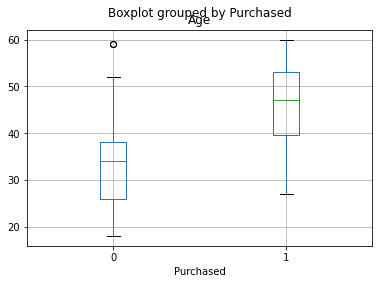

In [34]:
ads.boxplot(column=['Age'], by='Purchased');

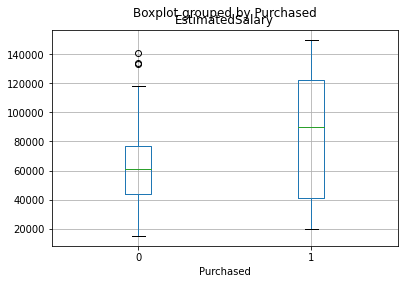

In [35]:
ads.boxplot(column=['EstimatedSalary'], by='Purchased');

### Vamos fazer três testes e verificar qual deles tem maior acertividade!

Teste 1: Se a idade for acima da média, então a pessoa é compradora, caso contrário, não é. 

In [36]:
def aux1(x):
    if x > ads['Age'].mean():
        return 1
    else:
        return 0

ads['Teste1'] = ads['Age'].apply(aux1)
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Teste1
0,15624510,Male,19.0,19000.0,0,0
1,15810944,Male,35.0,20000.0,0,0
2,15668575,Female,26.0,43000.0,0,0
3,15603246,Female,27.0,57000.0,0,0
4,15804002,Male,19.0,76000.0,0,0


In [37]:
ads['Purchased'].groupby(ads['Teste1']).mean()

Teste1
0    0.138095
1    0.600000
Name: Purchased, dtype: float64

Teste 2: Se o salário estimado for acima da média, então a pessoa é compradora, caso contrário, não é. 

In [38]:
ads['Teste2'] = 0
ads.loc[ads['EstimatedSalary'] > ads['EstimatedSalary'].mean(), 'Teste2'] = 1
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Teste1,Teste2
0,15624510,Male,19.0,19000.0,0,0,0
1,15810944,Male,35.0,20000.0,0,0,0
2,15668575,Female,26.0,43000.0,0,0,0
3,15603246,Female,27.0,57000.0,0,0,0
4,15804002,Male,19.0,76000.0,0,0,1


In [39]:
ads['Purchased'].groupby(ads['Teste2']).mean()

Teste2
0    0.236181
1    0.477612
Name: Purchased, dtype: float64

Vamos investigar mais a fundo esse conjunto de dados. Para isso, vamos fazer rapidamente um gráfico para dar uma ideia do que temos em mãos

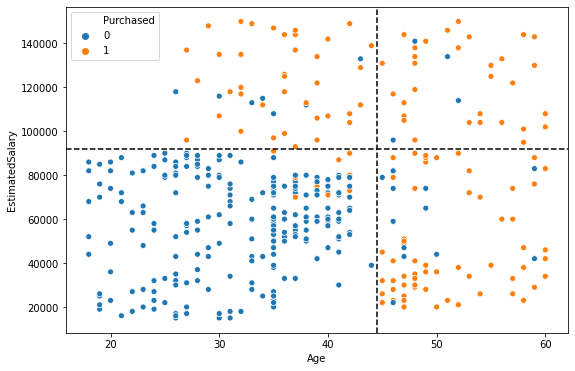

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (9,6))
sns.scatterplot(x = ads['Age'], y = ads['EstimatedSalary'], hue = ads['Purchased']);
plt.axvline(44.5, color = 'black', linestyle = 'dashed')
plt.axhline(92000, color = 'black', linestyle = 'dashed') 
plt.show()

Teste 3: Se a idade for maior que 44.5 ou o salário estimado for acima de 90000, então a pessoa é compradora, caso contrário, não é. 

In [44]:
ads['Teste3'] = 1
ads.loc[(ads['Age'] < 44.5) & (ads['EstimatedSalary'] < 92000), 'Teste3'] = 0

In [45]:
ads['Purchased'].groupby(ads['Teste3']).mean()

Teste3
0    0.041152
1    0.847134
Name: Purchased, dtype: float64

## Calculando a ACURÁCIA (TAXA DE ACERTO)

In [46]:
(ads['Purchased'] == ads['Teste1']).mean()

0.7375

In [47]:
(ads['Purchased'] == ads['Teste2']).mean()

0.62

In [48]:
(ads['Purchased'] == ads['Teste3']).mean()

0.915

## **Conclusão:** Um preditor com 91,5% de acerto para a variável Purchased é dizer que uma pessoa é compradora se sua idade for maior que 45 ou se seu salário estimado for superior a 92000, e não compradora no caso contrário.

## **Exercício 7:** Carregue os dados do Titanic com nome de 'train.csv', disponivel nesse link https://github.com/ricardorocha86/Datasets/tree/master/Titanic. 

Utilizando o método isnull(), verifique se há dados faltantes no conjunto de dados. Se tiver, faça a substituição deles por valores pertinentes de acordo com as seguintes instruções: 
- Se tiver mais de 50% de dados faltantes, retire a variável do conjunto de dados
- Se tiver menos de 50% e a variável for categórica, atribua aos valores faltantes a moda da variável. 
- Se tiver menos de 50% e a variável for contínua, atribua aos valores faltantes a média da variável. 